# Exploratory Data Analysis on Game of Thrones(Episode Data):

#### Thirumurugan Ramar,Btech CSE,IIIT Guwahati



Game of Thrones is one of the world's most popular TV shows, so why not  explore information about it. Which season is the most popular? Is there are link between ratings and viewer figures? Do certain writers and directors make better episodes? and More!

Dataset source: Kaggle

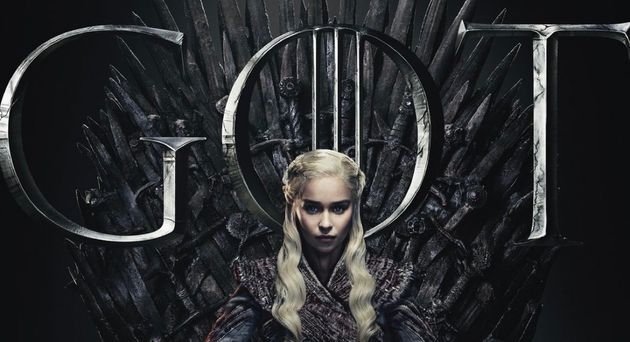

In [1]:
from IPython.display import Image
Image(filename="got1.jpeg")

### Imports:

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# function for Labelling Data

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

### Input files:

In [4]:
got_df = pd.read_csv("got.csv",encoding = 'ISO-8859-1')
got_df.head()

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"AprilåÊ17,åÊ2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"AprilåÊ24,åÊ2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"MayåÊ1,åÊ2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"MayåÊ8,åÊ2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"MayåÊ15,åÊ2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5


### Analysis:

In [5]:
print("Number of seasons : ", len(got_df.Season.unique()))

Number of seasons :  8


In [6]:
print("Total no of episodes", got_df.shape[0])

Total no of episodes 73


sns.countplot(x='Season', data=got_df)
plt.ylabel('No of Episodes', fontsize=12)
plt.title('No of Episodes per Season')
plt.show()

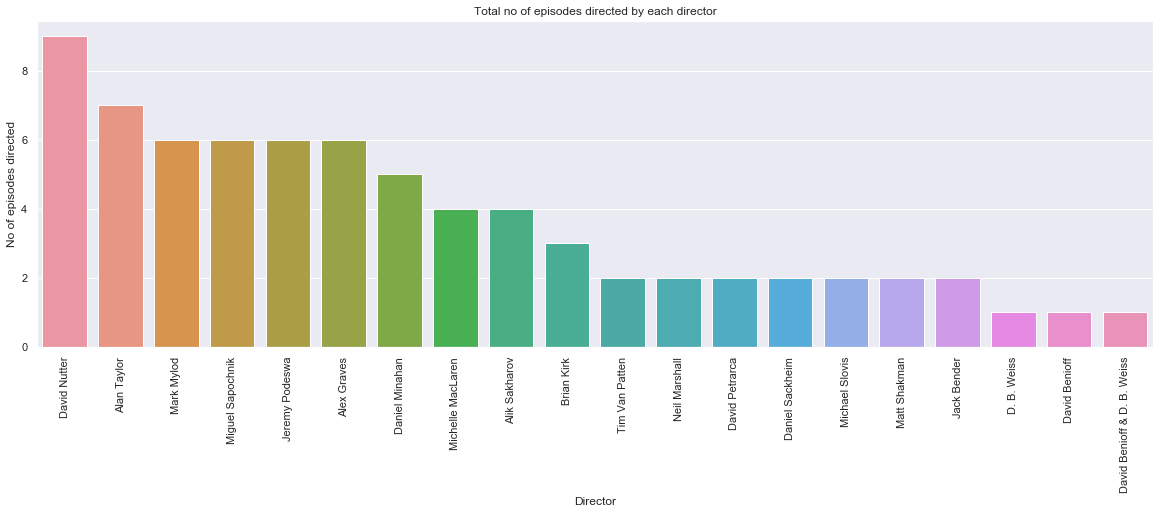

In [7]:
plt.figure(figsize=(20,6))
sns.countplot(x='Director', data=got_df,order = got_df['Director'].value_counts().index)
plt.ylabel('No of episodes directed', fontsize=12)
plt.title('Total no of episodes directed by each director')
plt.xticks(rotation='vertical')
plt.show()

### -> David Hunter has directed the  most number of GOT episodes.( 9 episodes)

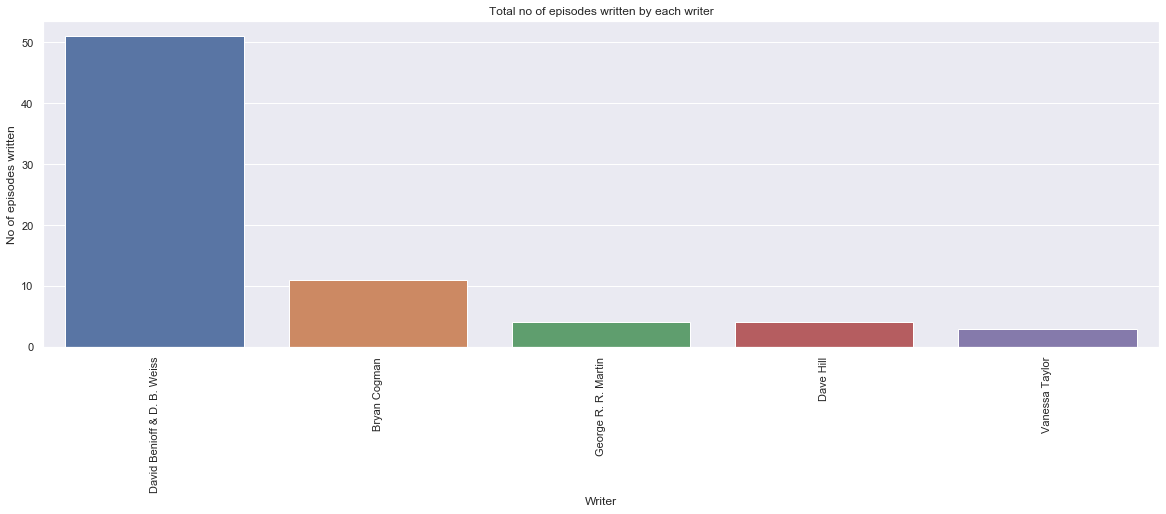

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x='Writer', data=got_df,order = got_df['Writer'].value_counts().index)
plt.ylabel('No of episodes written', fontsize=12)
plt.title('Total no of episodes written by each writer')
plt.xticks(rotation='vertical')
plt.show()

### -> David Benioff & D.B Weiss tops the list

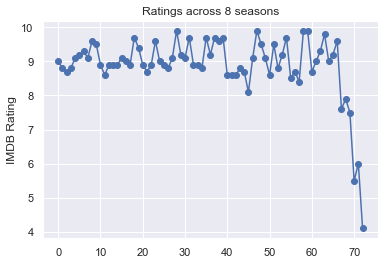

<Figure size 1080x1080 with 0 Axes>

In [9]:
plt.plot('Imdb Rating', data=got_df, linestyle='-', marker='o')
plt.ylabel('IMDB Rating', fontsize=12)
plt.title('Ratings across 8 seasons')
plt.figure(figsize=(15,15))
plt.show()

### ->The final episodes were least rated in IMDB :(

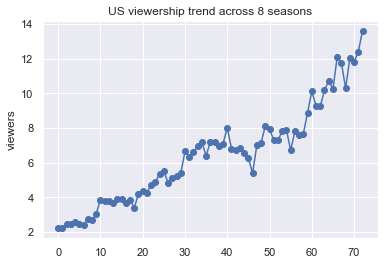

<Figure size 1080x1080 with 0 Axes>

In [10]:
plt.plot('US viewers (million)', data=got_df, linestyle='-', marker='o')
plt.ylabel('viewers', fontsize=12)
plt.title('US viewership trend across 8 seasons')
plt.figure(figsize=(15,15))
plt.show()

### -> final episode has more than 13 million US viewership!(though its the least rated among all episodes)

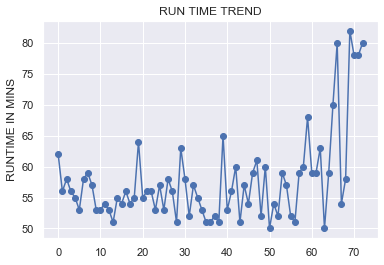

<Figure size 1080x1080 with 0 Axes>

In [11]:
plt.plot('Runtime (mins)', data=got_df, linestyle='-', marker='o')
plt.ylabel('RUNTIME IN MINS', fontsize=12)
plt.title('RUN TIME TREND')
plt.figure(figsize=(15,15))
plt.show()

### -> Runtime was comparitively more in the last 2 seasons!( less episodes)

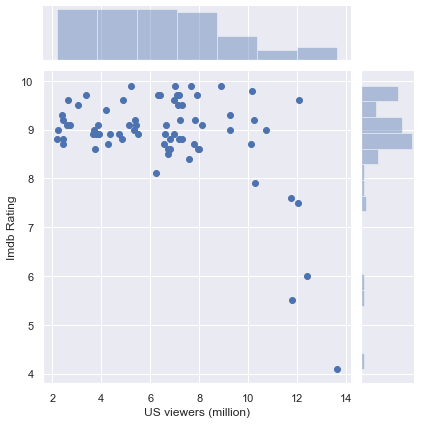

In [12]:
ax = sns.jointplot(got_df['US viewers (million)'], got_df['Imdb Rating'])

### -> Ratings were consistent till 8 million US viewers.

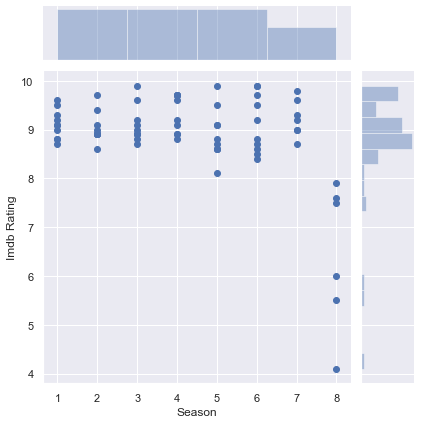

In [13]:
ax = sns.jointplot(got_df['Season'], got_df['Imdb Rating'])

### -> Season 1 has high IMDB ratings,whereas Season 8 has the least IMDB ratings.

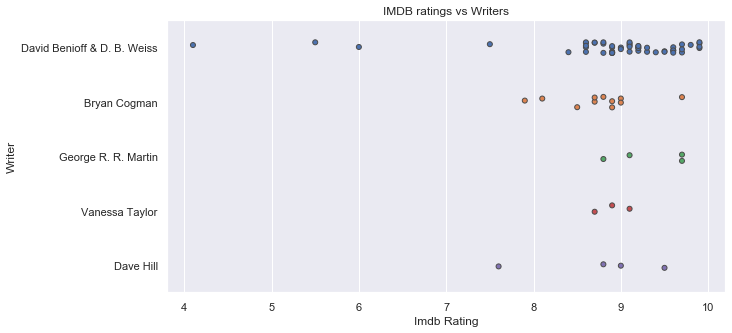

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
p = sns.stripplot(x="Imdb Rating", y="Writer", data=got_df, jitter=True, linewidth=1)
title = ax.set_title('IMDB ratings vs Writers')

### -> David Benioff & D.B Weiss is the best writer,followed by Bryan Cogman!

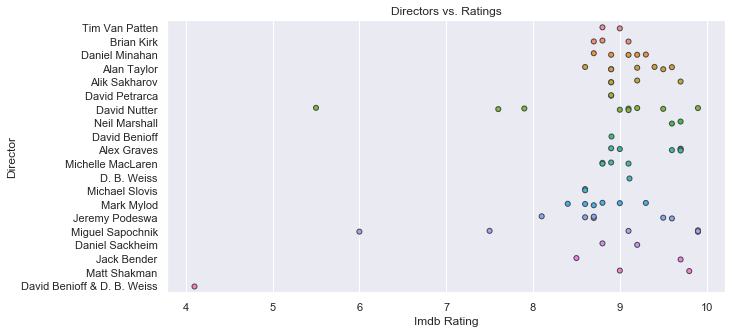

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
p = sns.stripplot(x="Imdb Rating", y="Director", data=got_df, jitter=True, linewidth=1)
title = ax.set_title('Directors vs. Ratings')

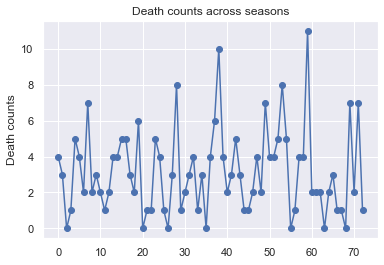

<Figure size 1080x1080 with 0 Axes>

In [16]:
plt.plot('Notable Death Count', data=got_df, linestyle='-', marker='o')
plt.ylabel('Death counts', fontsize=12)
plt.title('Death counts across seasons')
plt.figure(figsize=(15,15))
plt.show()

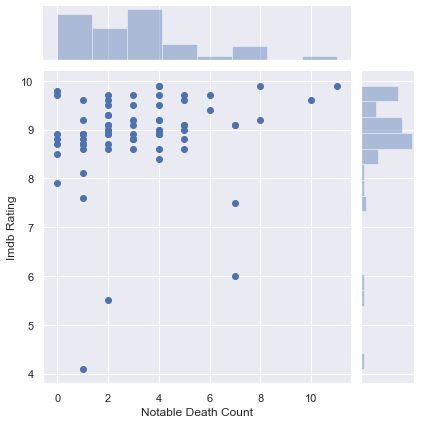

In [17]:
ax = sns.jointplot(got_df['Notable Death Count'], got_df['Imdb Rating'])

### -> Most of the Top rated episodes have death count between 2 to 8!

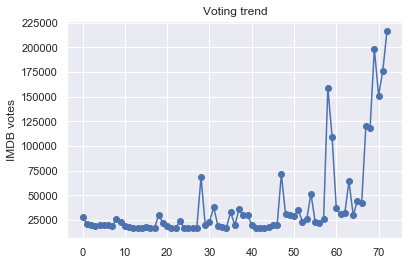

<Figure size 1080x1080 with 0 Axes>

In [18]:
plt.plot('IMDB votes', data=got_df, linestyle='-', marker='o')
plt.ylabel('IMDB votes', fontsize=12)
plt.title('Voting trend')
plt.figure(figsize=(15,15))
plt.show()

### -> Voting trend has increased across seasons!(slight peak in some episodes between)

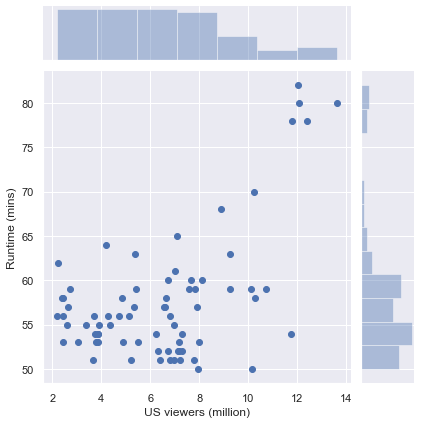

In [19]:
ax = sns.jointplot(got_df['US viewers (million)'], got_df['Runtime (mins)'])

In [20]:
import sys
!{sys.executable} -m pip install textblob

In [21]:
from textblob import TextBlob

In [22]:
got_df['polarity'] = got_df.apply(lambda x: TextBlob(x['IMDB Description']).sentiment.polarity, axis=1)
got_df['subjectivity'] = got_df.apply(lambda x: TextBlob(x['IMDB Description']).sentiment.subjectivity, axis=1)


In [23]:
got_df.head()

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count,polarity,subjectivity
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"AprilåÊ17,åÊ2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4,-0.2,0.5
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"AprilåÊ24,åÊ2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3,0.0,1.0
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"MayåÊ1,åÊ2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0,-0.2,0.6
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"MayåÊ8,åÊ2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1,0.0,0.0
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"MayåÊ15,åÊ2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5,-0.2,0.0


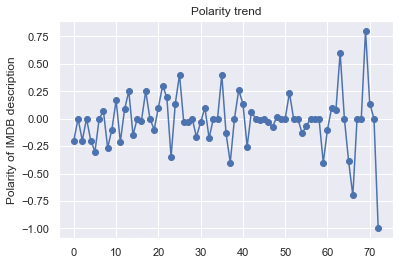

<Figure size 1080x1080 with 0 Axes>

In [24]:
plt.plot('polarity', data=got_df, linestyle='-', marker='o')
plt.ylabel('Polarity of IMDB description', fontsize=12)
plt.title('Polarity trend')
plt.figure(figsize=(15,15))
plt.show()

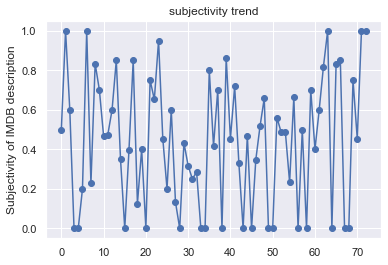

<Figure size 1080x1080 with 0 Axes>

In [25]:
plt.plot('subjectivity', data=got_df, linestyle='-', marker='o')
plt.ylabel('Subjectivity of IMDB description', fontsize=12)
plt.title('subjectivity trend')
plt.figure(figsize=(15,15))
plt.show()